# 라이브러리 불러오기

In [174]:
import pandas as pd 
import numpy as np

# 시각화 준비
import matplotlib
import matplotlib.pyplot as plt

# Jupyter Notebook 내부에 그래프를 출력하도록 설정
%matplotlib inline

# Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# 한글 깨지는거 방지하기
from matplotlib import font_manager, rc

import platform
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정

# datetime 객체 추가
from datetime import datetime, timedelta

# feature_engineering 도와주는 all dataframe 불러오기

In [175]:
all = pd.read_csv("../input/all_df.CSV", engine = "python", encoding = 'CP949')
# Unnamed: 0 이라는 이름의 column 제거, 인덱싱 값이 들어가 있음
del all['Unnamed: 0']
all  = all.loc[all.항공사 != "타이완"]

all = all.reset_index(drop=True)

# 전처리된 train data 불러오기

In [176]:
# pred에서 한 작업을 똑같이 진행
train = pd.read_csv("../input/train_preprocessed.CSV", engine = "python", encoding ='CP949')
print('Dataframe dimensions:', train.shape)
del train['Unnamed: 0']

train.columns = ['년','월','일', '요일', '공항',  '출도착', '상대공항', '항공사', '항공편', '식별번호',
             '계획', '실제', '지연', '지연사유', '결항', '결항사유', '부정기편']
recollist = ['년','월','일', '요일', '공항', '출도착', '상대공항', '항공사', '항공편', '식별번호', 
              '계획', '실제', '지연', '지연사유', '결항', '결항사유', '부정기편']
train = train[recollist]

print(train['공항'].unique())
print(train.head())


# transairport = {'ARP1':'김포', 'ARP2':'김해', 'ARP3': '제주', 'ARP4':'대구', 'ARP5': '울산',
#            'ARP6':'청주', 'ARP7':'무안', 'ARP8':'광주', 'ARP9':'여수', 'ARP10':'양양',
#            'ARP11':'포항', 'ARP12':'사천', 'ARP13':'군산', 'ARP14':'원주', 'ARP15':'인천'}
# train['공항'] = train['공항'].apply(lambda x: transairport[x])
# train['상대공항'] = train['상대공항'].apply(lambda x: transairport[x])
# train["출도착"] = train["출도착"].apply(lambda x: "출발" if x=="D" else x)
# train["출도착"] = train["출도착"].apply(lambda x: "도착" if x=="A" else x)
#df = df.iloc[df['항공사']!= ['C', 'D', 'E', 'G', 'K'],]

# transairline = {'A':'아시아나', 'B':'에어부산', 'C': '전일본항공ANA', 'D':'에어서울', 'E': '불명',
#            'F':'이스타', 'G':'일본항공', 'H':'제주항공', 'I':'진에어', 'J':'대한항공',
#            'K':'타이완', 'L':'티웨이', 'M':'신규'}
# train['항공사'] = train['항공사'].apply(lambda x: transairline[x])
# train.to_pickle("train.pickle")
print(len(train))

Dataframe dimensions: (978734, 18)
['제주' '김해' '김포' '대구' '광주' '원주' '사천' '청주' '울산' '여수' '군산' '포항' '인천' '무안'
 '양양']
      년  월  일 요일  공항 출도착 상대공항   항공사    항공편      식별번호     계획     실제 지연 지연사유 결항  \
0  2017  1  1  일  제주  출발   청주  대한항공  J1955  SEw3NzE4  10:05  10:32  N  NaN  N   
1  2017  1  1  일  제주  도착   청주  대한항공  J1954  SEw3NzE4  09:30  09:31  N  NaN  N   
2  2017  1  1  일  제주  도착   청주  대한항공  J1956  SEw3NzE4  12:45  13:03  N  NaN  N   
3  2017  1  1  일  제주  출발   청주  대한항공  J1957  SEw3NzE4  13:25  14:09  Y  C02  N   
4  2017  1  1  일  제주  도착   청주  대한항공  J1958  SEw3NzE4  16:10  16:31  N  NaN  N   

   결항사유 부정기편  
0   NaN    N  
1   NaN    N  
2   NaN    N  
3   NaN    N  
4   NaN    N  
978734


# test data 불러오기 -> pred

In [177]:
pred = pd.read_csv("../input/AFSNT_DLY.CSV", engine = "python", encoding = 'CP949')
print('Dataframe dimensions:', pred.shape)

# pred 칼럼을 한글로 변경
pred.columns = ['년','월','일', '요일', '공항', '상대공항', '항공사', '항공편', '출도착', '계획', '지연', '지연확률']

# pred 칼럼을 재정렬하기 위한 배열
recollist = ['년','월','일', '요일', '공항', '출도착', '상대공항', '항공사', '항공편', '계획', '지연', '지연확률']
# pred 칼럼 재정렬
pred = pred[recollist]

# 공항이름 한글로 변경
# 딕셔너리로 만들어준 뒤 해당 키값의 value로 값을 매핑함
transairport = {'ARP1':'김포', 'ARP2':'김해', 'ARP3': '제주', 'ARP4':'대구', 'ARP5': '울산',
           'ARP6':'청주', 'ARP7':'무안', 'ARP8':'광주', 'ARP9':'여수', 'ARP10':'양양',
           'ARP11':'포항', 'ARP12':'사천', 'ARP13':'군산', 'ARP14':'원주', 'ARP15':'인천'}
pred['공항'] = pred['공항'].apply(lambda x: transairport[x])
pred['상대공항'] = pred['상대공항'].apply(lambda x: transairport[x])

# 출발 도착 한글화
pred["출도착"] = pred["출도착"].apply(lambda x: "출발" if x=="D" else x)
pred["출도착"] = pred["출도착"].apply(lambda x: "도착" if x=="A" else x)

# 항공사 한글로 변경
transairline = {'A':'아시아나', 'B':'에어부산', 'C': '전일본항공ANA', 'D':'에어서울', 'E': '불명',
           'F':'이스타', 'G':'일본항공', 'H':'제주항공', 'I':'진에어', 'J':'대한항공',
           'K':'타이완', 'L':'티웨이', 'M':'신규'}
pred['항공사'] = pred['항공사'].apply(lambda x: transairline[x])

# 확인
pred.head(5)


Dataframe dimensions: (16076, 12)


,년,월,일,요일,공항,출도착,상대공항,항공사,항공편,계획,지연,지연확률
0,2019,9,16,월,김포,도착,제주,티웨이,L1702,9:05,NaN,NaN
1,2019,9,16,월,제주,출발,김포,티웨이,L1702,7:55,NaN,NaN
2,2019,9,16,월,김포,도착,제주,티웨이,L1720,14:40,NaN,NaN
3,2019,9,16,월,제주,출발,김포,티웨이,L1720,13:30,NaN,NaN
4,2019,9,16,월,대구,도착,제주,티웨이,L1808,20:10,NaN,NaN


# 계획 시간 별 지연율 추가

In [178]:
departure_time = all['예정출발시간'].apply(lambda x : int(x[11:13]))

all['departure_time'] = all['예정출발시간'].apply(lambda x : int(x[11:13]))
train['departure_time'] = train['계획'].apply(lambda x: int(x[:1]) if len(x) == 4 else int(x[:2]))
pred['departure_time'] = pred['계획'].apply(lambda x: int(x[:1]) if len(x) == 4 else int(x[:2]))

flo_del_start = all.loc[all.출발편지연여부 == 'Y']["departure_time"].value_counts()*100/all["departure_time"].value_counts()

# series를 df로 변환
frame = flo_del_start.to_frame()
frame['flo_del_start'] = frame.departure_time
frame['departure_time'] = frame.index
# train, all, pred에 만든 departure)_time을 key값으로 병합
train= pd.merge(train, frame, on = "departure_time")
pred = pd.merge(pred, frame, on = "departure_time")

# departure_time의 NaN을 0으로 치환
train = train.fillna({'departure_time': 0})
pred = pred.fillna({'departure_time': 0})
all = all.fillna({'departure_time': 0})

train.head(10)
print(len(train))

978720


# 계획 시간별, 딜레이 시간 평균 구하기



In [179]:
dp_time = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
print(len(dp_time))
temp = np.zeros(24)
dp_time_avg_min_dic = dict(zip(dp_time, temp))
print(dp_time_avg_min_dic)


for time in dp_time_avg_min_dic:
    dp_time_avg_min_dic[time] = all.loc[all.departure_time == time]['x_차이'].mean()


print(dp_time_avg_min_dic)



whole_row_num_train = train.shape[0]
whole_row_num_pred = pred.shape[0]
print(whole_row_num_train)
print(whole_row_num_pred)

train['계획시간별_평균지연시간'] = pd.Series(np.random.randn(whole_row_num_train), index=train.index)
pred['계획시간별_평균지연시간'] = pd.Series(np.random.randn(whole_row_num_pred), index=pred.index)

temp_frame_train = pd.Series()
temp_frame_pred = pd.Series()

for dp_time in dp_time_avg_min_dic:
    print(dp_time_avg_min_dic[dp_time])
    temp_train = train.loc[train.departure_time == dp_time]['계획시간별_평균지연시간'].apply(lambda x : dp_time_avg_min_dic[dp_time])
    temp_pred = pred.loc[pred.departure_time == dp_time]['계획시간별_평균지연시간'].apply(lambda x : dp_time_avg_min_dic[dp_time])
    temp_frame_train = temp_frame_train.append(temp_train)
    temp_frame_pred = temp_frame_pred.append(temp_pred)
    
    
del train['계획시간별_평균지연시간']
del pred['계획시간별_평균지연시간']


frame_train = temp_frame_train.to_frame()
frame_train['계획시간별_평균지연시간'] = frame_train
train = pd.concat([train, frame_train['계획시간별_평균지연시간']], axis=1)


frame_pred = temp_frame_pred.to_frame()
frame_pred['계획시간별_평균지연시간'] = frame_pred
pred = pd.concat([pred, frame_pred['계획시간별_평균지연시간']], axis=1)

print(train['계획시간별_평균지연시간'].isnull().sum())
print(pred['계획시간별_평균지연시간'].isnull().sum())

train = train.fillna({'계획시간별_평균지연시간': 0})
pred = pred.fillna({'계획시간별_평균지연시간': 0})



print(len(train))

24
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0}
{0: 44.95238095238095, 1: nan, 2: nan, 3: nan, 4: nan, 5: 52.333333333333336, 6: 16.119254722322303, 7: 17.334495735938958, 8: 20.42479674796748, 9: 21.17603828933148, 10: 21.840335879713834, 11: 22.530349614884784, 12: 21.981315504156125, 13: 24.63086053412463, 14: 24.26694127026309, 15: 25.38186753190029, 16: 23.721590420808386, 17: 24.21859482906227, 18: 24.12289366647298, 19: 22.435535617955196, 20: 22.174988094802007, 21: 23.765069449059613, 22: 20.615384615384617, 23: 34.4}
978720
16076
44.95238095238095
nan
nan
nan
nan
52.333333333333336
16.119254722322303
17.334495735938958
20.42479674796748
21.17603828933148
21.840335879713834
22.530349614884784
21.981315504156125
24.63086053412463
24.26694127026309
25.38186753190029
23.721590420808386
24.21859482906227
24.12289366647298

# 출발편 항공사별 지연율

In [180]:
# 
flo_del_start = all.loc[all.출발편지연여부 == 'Y']["항공사"].value_counts()*100/all["항공사"].value_counts()

print(flo_del_start)
frame = flo_del_start.to_frame()
frame['flo_del_start'] = frame.항공사 
frame['항공사'] = frame.index
train= pd.merge(train, frame, on = "항공사")
pred = pd.merge(pred, frame, on = "항공사")

train.head(3)
print(len(train))
len(pred)
print(len(train))

대한항공    14.153042
아시아나    17.146814
에어부산    15.507367
이스타     19.882183
제주항공    20.391672
진에어     22.930423
티웨이     19.658120
Name: 항공사, dtype: float64
978711
978711


# 도착편 항공사별 지연율

In [181]:
flo_del_finish = (all.loc[all.도착편지연여부 == 'Y']["항공사"].value_counts()*100/all["항공사"].value_counts()).sort_values(ascending = False)
print(flo_del_finish)
frame = flo_del_finish.to_frame()
print(frame)
frame['flo_del_finish'] = frame.항공사 
frame['항공사'] = frame.index
print(frame)
train= pd.merge(train, frame, on = "항공사")
pred = pd.merge(pred, frame, on = "항공사")
train.head(3)
print(len(train))

이스타     8.717079
티웨이     8.667389
진에어     8.099960
제주항공    7.497365
아시아나    6.777003
에어부산    6.216071
대한항공    4.775679
Name: 항공사, dtype: float64
           항공사
이스타   8.717079
티웨이   8.667389
진에어   8.099960
제주항공  7.497365
아시아나  6.777003
에어부산  6.216071
대한항공  4.775679
       항공사  flo_del_finish
이스타    이스타        8.717079
티웨이    티웨이        8.667389
진에어    진에어        8.099960
제주항공  제주항공        7.497365
아시아나  아시아나        6.777003
에어부산  에어부산        6.216071
대한항공  대한항공        4.775679
978711


# 도착 and 출발편 항공사별 지연율

In [182]:
flo_del_all = (all.loc[(all.도착편지연여부 == 'Y')&(all.출발편지연여부 == 'Y')]["항공사"].value_counts()*100/all["항공사"].value_counts()).sort_values(ascending = False)
frame = flo_del_all.to_frame()
frame['flo_del_all'] = frame.항공사 
frame['항공사'] = frame.index
train= pd.merge(train, frame, on = "항공사")
pred = pd.merge(pred, frame, on = "항공사")
train.head(3)
print(len(train))

978711


# 항공사에 따른 출발편 지연율 - 도착편 지연율

In [183]:
flo_del_diff = (all.loc[all.출발편지연여부 == 'Y']["항공사"].value_counts()*100/all["항공사"].value_counts()).sort_values(ascending = False) - (all.loc[all.도착편지연여부 == 'Y']["항공사"].value_counts()*100/all["항공사"].value_counts()).sort_values(ascending = False)
frame = flo_del_diff.to_frame()
frame['flo_del_diff'] = frame.항공사 
frame['항공사'] = frame.index
train= pd.merge(train, frame, on = "항공사")
pred = pd.merge(pred, frame, on = "항공사")
train.head(3)
print(len(train))

978711


# 출발편 지연된 것들만의 항공사별 지연시간 평균

In [184]:
air_comp = all['항공사'].unique()
temp = np.arange(8)
air_comp_avg_min_dic = dict(zip(air_comp, temp))



for air_comp in air_comp_avg_min_dic:
    air_comp_avg_min_dic[air_comp] = all.loc[all.출발편지연여부 == 'Y'].loc[all.항공사 == air_comp]['x_차이'].mean()
    
print(air_comp_avg_min_dic)


whole_row_num_train = train.shape[0]
whole_row_num_pred = pred.shape[0]
print(whole_row_num_train)
print(whole_row_num_pred)

train['출발지연만_항공사별지연시간평균'] = pd.Series(np.random.randn(whole_row_num_train), index=train.index)
pred['출발지연만_항공사별지연시간평균'] = pd.Series(np.random.randn(whole_row_num_pred), index=pred.index)

temp_frame_train = pd.Series()
temp_frame_pred = pd.Series()

for air_comp in air_comp_avg_min_dic:
    print(air_comp_avg_min_dic[air_comp])
    temp_train = train.loc[train.항공사 == air_comp]['출발지연만_항공사별지연시간평균'].apply(lambda x : air_comp_avg_min_dic[air_comp])
    temp_pred = pred.loc[pred.항공사 == air_comp]['출발지연만_항공사별지연시간평균'].apply(lambda x : air_comp_avg_min_dic[air_comp])
    temp_frame_train = temp_frame_train.append(temp_train)
    temp_frame_pred = temp_frame_pred.append(temp_pred)
    
    
del train['출발지연만_항공사별지연시간평균']
del pred['출발지연만_항공사별지연시간평균']


frame_train = temp_frame_train.to_frame()
frame_train['출발지연만_항공사별지연시간평균'] = frame_train
train = pd.concat([train, frame_train['출발지연만_항공사별지연시간평균']], axis=1)


frame_pred = temp_frame_pred.to_frame()
frame_pred['출발지연만_항공사별지연시간평균'] = frame_pred
pred = pd.concat([pred, frame_pred['출발지연만_항공사별지연시간평균']], axis=1)

print(train['출발지연만_항공사별지연시간평균'].isnull().sum())
print(pred['출발지연만_항공사별지연시간평균'].isnull().sum())

train = train.fillna({'출발지연만_항공사별지연시간평균': 0})
pred = pred.fillna({'출발지연만_항공사별지연시간평균': 0})

pred.head()




print(len(train))



{'대한항공': 47.87514264965245, '에어부산': 51.910078861319484, '이스타': 55.34021212819922, '아시아나': 53.053400974567786, '제주항공': 50.77871001573151, '진에어': 50.155277777777776, '티웨이': 52.896509491733006}
978711
15980
47.87514264965245
51.910078861319484
55.34021212819922
53.053400974567786
50.77871001573151
50.155277777777776
52.896509491733006
0
0
978711


# 도착편 지연된 것들만의 항공사별 지연시간의 평균

In [185]:
air_comp = all['항공사'].unique()
temp = np.arange(8)
air_comp_avg_min_dic = dict(zip(air_comp, temp))



for air_comp in air_comp_avg_min_dic:
    air_comp_avg_min_dic[air_comp] = all.loc[all.도착편지연여부 == 'Y'].loc[all.항공사 == air_comp]['y_차이'].mean()
    
print(air_comp_avg_min_dic)


whole_row_num_train = train.shape[0]
whole_row_num_pred = pred.shape[0]
print(whole_row_num_train)
print(whole_row_num_pred)

train['도착지연만_항공사별지연시간평균'] = pd.Series(np.random.randn(whole_row_num_train), index=train.index)
pred['도착지연만_항공사별지연시간평균'] = pd.Series(np.random.randn(whole_row_num_pred), index=pred.index)

temp_frame_train = pd.Series()
temp_frame_pred = pd.Series()

for air_comp in air_comp_avg_min_dic:
    print(air_comp_avg_min_dic[air_comp])
    temp_train = train.loc[train.항공사 == air_comp]['도착지연만_항공사별지연시간평균'].apply(lambda x : air_comp_avg_min_dic[air_comp])
    temp_pred = pred.loc[pred.항공사 == air_comp]['도착지연만_항공사별지연시간평균'].apply(lambda x : air_comp_avg_min_dic[air_comp])
    temp_frame_train = temp_frame_train.append(temp_train)
    temp_frame_pred = temp_frame_pred.append(temp_pred)
    
    
del train['도착지연만_항공사별지연시간평균']
del pred['도착지연만_항공사별지연시간평균']


frame_train = temp_frame_train.to_frame()
frame_train['도착지연만_항공사별지연시간평균'] = frame_train
train = pd.concat([train, frame_train['도착지연만_항공사별지연시간평균']], axis=1)


frame_pred = temp_frame_pred.to_frame()
frame_pred['도착지연만_항공사별지연시간평균'] = frame_pred
pred = pd.concat([pred, frame_pred['도착지연만_항공사별지연시간평균']], axis=1)

print(train['도착지연만_항공사별지연시간평균'].isnull().sum())
print(pred['도착지연만_항공사별지연시간평균'].isnull().sum())

train = train.fillna({'도착지연만_항공사별지연시간평균': 0})
pred = pred.fillna({'도착지연만_항공사별지연시간평균': 0})

pred.head()




print(len(train))



{'대한항공': 55.233820138355114, '에어부산': 60.34812859884837, '이스타': 63.399158559032344, '아시아나': 62.221584191859485, '제주항공': 57.74714751426243, '진에어': 56.254259501965926, '티웨이': 58.750277777777775}
978711
15980
55.233820138355114
60.34812859884837
63.399158559032344
62.221584191859485
57.74714751426243
56.254259501965926
58.750277777777775
0
0
978711


# 출발편 지연Y & N 항공편사별 지연시간 평균

In [186]:
air_comp = all['항공사'].unique()
temp = np.arange(8)
air_comp_avg_min_dic = dict(zip(air_comp, temp))



for air_comp in air_comp_avg_min_dic:
    air_comp_avg_min_dic[air_comp] = all.loc[all.항공사 == air_comp]['x_차이'].mean()
    
print(air_comp_avg_min_dic)


whole_row_num_train = train.shape[0]
whole_row_num_pred = pred.shape[0]
print(whole_row_num_train)
print(whole_row_num_pred)

train['출발_항공사별지연시간평균'] = pd.Series(np.random.randn(whole_row_num_train), index=train.index)
pred['출발_항공사별지연시간평균'] = pd.Series(np.random.randn(whole_row_num_pred), index=pred.index)

temp_frame_train = pd.Series()
temp_frame_pred = pd.Series()

for air_comp in air_comp_avg_min_dic:
    print(air_comp_avg_min_dic[air_comp])
    temp_train = train.loc[train.항공사 == air_comp]['출발_항공사별지연시간평균'].apply(lambda x : air_comp_avg_min_dic[air_comp])
    temp_pred = pred.loc[pred.항공사 == air_comp]['출발_항공사별지연시간평균'].apply(lambda x : air_comp_avg_min_dic[air_comp])
    temp_frame_train = temp_frame_train.append(temp_train)
    temp_frame_pred = temp_frame_pred.append(temp_pred)
    
    
del train['출발_항공사별지연시간평균']
del pred['출발_항공사별지연시간평균']


frame_train = temp_frame_train.to_frame()
frame_train['출발_항공사별지연시간평균'] = frame_train
train = pd.concat([train, frame_train['출발_항공사별지연시간평균']], axis=1)


frame_pred = temp_frame_pred.to_frame()
frame_pred['출발_항공사별지연시간평균'] = frame_pred
pred = pd.concat([pred, frame_pred['출발_항공사별지연시간평균']], axis=1)

print(train['출발_항공사별지연시간평균'].isnull().sum())
print(pred['출발_항공사별지연시간평균'].isnull().sum())

train = train.fillna({'출발_항공사별지연시간평균': 0})
pred = pred.fillna({'출발_항공사별지연시간평균': 0})

pred.head()



print(len(train))




{'대한항공': 21.28210643780605, '에어부산': 20.577611406072897, '이스타': 23.487358745730855, '아시아나': 22.005219242523093, '제주항공': 23.805187663260163, '진에어': 25.057241130384934, '티웨이': 23.5634765860118}
978711
15980
21.28210643780605
20.577611406072897
23.487358745730855
22.005219242523093
23.805187663260163
25.057241130384934
23.5634765860118
0
0
978711


# 도착편 지연Y & N 항공편사별 지연시간 평균

In [187]:
air_comp = all['항공사'].unique()
temp = np.arange(8)
air_comp_avg_min_dic = dict(zip(air_comp, temp))



for air_comp in air_comp_avg_min_dic:
    air_comp_avg_min_dic[air_comp] = all.loc[all.항공사 == air_comp]['y_차이'].mean()
    
print(air_comp_avg_min_dic)


whole_row_num_train = train.shape[0]
whole_row_num_pred = pred.shape[0]
print(whole_row_num_train)
print(whole_row_num_pred)

train['도착_항공사별지연시간평균'] = pd.Series(np.random.randn(whole_row_num_train), index=train.index)
pred['도착_항공사별지연시간평균'] = pd.Series(np.random.randn(whole_row_num_pred), index=pred.index)

temp_frame_train = pd.Series()
temp_frame_pred = pd.Series()

for air_comp in air_comp_avg_min_dic:
    print(air_comp_avg_min_dic[air_comp])
    temp_train = train.loc[train.항공사 == air_comp]['도착_항공사별지연시간평균'].apply(lambda x : air_comp_avg_min_dic[air_comp])
    temp_pred = pred.loc[pred.항공사 == air_comp]['도착_항공사별지연시간평균'].apply(lambda x : air_comp_avg_min_dic[air_comp])
    temp_frame_train = temp_frame_train.append(temp_train)
    temp_frame_pred = temp_frame_pred.append(temp_pred)
    
    
del train['도착_항공사별지연시간평균']
del pred['도착_항공사별지연시간평균']


frame_train = temp_frame_train.to_frame()
frame_train['도착_항공사별지연시간평균'] = frame_train
train = pd.concat([train, frame_train['도착_항공사별지연시간평균']], axis=1)


frame_pred = temp_frame_pred.to_frame()
frame_pred['도착_항공사별지연시간평균'] = frame_pred
pred = pd.concat([pred, frame_pred['도착_항공사별지연시간평균']], axis=1)

print(train['도착_항공사별지연시간평균'].isnull().sum())
print(pred['도착_항공사별지연시간평균'].isnull().sum())

train = train.fillna({'도착_항공사별지연시간평균': 0})
pred = pred.fillna({'도착_항공사별지연시간평균': 0})

pred.head()


print(len(train))





{'대한항공': 3.909207039079076, '에어부산': 3.8562608125037285, '이스타': 6.786004080042176, '아시아나': 4.714326591811741, '제주항공': 5.538151322120893, '진에어': 5.774135331960339, '티웨이': 7.529529312627904}
978711
15980
3.909207039079076
3.8562608125037285
6.786004080042176
4.714326591811741
5.538151322120893
5.774135331960339
7.529529312627904
0
0
978711


# 지연확률에 근거한 클래스 분류 (지연률 sort후 4단계로 구성)

In [188]:
# 클래스 분류
all["delayed_class"] = 0
all.loc[all.항공사 == "대한항공", "delayed_class"] = "VL"
all.loc[all.항공사 == "아시아나", "delayed_class"] = "VL"
all.loc[all.항공사 == "에어부산", "delayed_class"] = "L"
all.loc[all.항공사 == "제주항공", "delayed_class"] = "H"
all.loc[all.항공사 == "진에어", "delayed_class"] = "H"
all.loc[all.항공사 == "이스타", "delayed_class"] = "M"
all.loc[all.항공사 == "티웨이", "delayed_class"] = "M"
all.loc[all.항공사 == "타이완", "delayed_class"] = "L"
print(len(train))

978711


# 항공사별 노선 횟수별 정리

In [189]:
# 항공사별 노선 횟수별 분류
train["airlines_classified"] = 0
train.loc[train.항공사 == "대한항공", "airlines_classified"] = "top"
train.loc[train.항공사 == "아시아나", "airlines_classified"] = "top"
train.loc[train.항공사 == "에어부산", "airlines_classified"] = "mid"
train.loc[train.항공사 == "제주항공", "airlines_classified"] = "mid"
train.loc[train.항공사 == "진에어", "airlines_classified"] = "low"
train.loc[train.항공사 == "이스타", "airlines_classified"] = "low"
train.loc[train.항공사 == "티웨이", "airlines_classified"] = "low"
train.loc[train.항공사 == "타이완", "airlines_classified"] = "rare"
print(len(train))

978711


In [190]:
pred["airlines_classified"] = 0
pred.loc[train.항공사 == "대한항공", "airlines_classified"] = "top"
pred.loc[train.항공사 == "아시아나", "airlines_classified"] = "top"
pred.loc[train.항공사 == "에어부산", "airlines_classified"] = "mid"
pred.loc[train.항공사 == "제주항공", "airlines_classified"] = "mid"
pred.loc[train.항공사 == "신규", "airlines_classified"] = "mid"
pred.loc[train.항공사 == "진에어", "airlines_classified"] = "low"
pred.loc[train.항공사 == "이스타", "airlines_classified"] = "low"
pred.loc[train.항공사 == "티웨이", "airlines_classified"] = "low"
pred.loc[train.항공사 == "타이완", "airlines_classified"] = "rare"
print(pred.head())

      년  월   일 요일  공항 출도착 상대공항  항공사    항공편    계획  ...  계획시간별_평균지연시간  \
0  2019  9  16  월  김포  도착   제주  티웨이  L1702  9:05  ...     21.176038   
1  2019  9  16  월  제주  도착   김포  티웨이  L1705  9:25  ...     21.176038   
2  2019  9  16  월  김포  도착   제주  티웨이  L1706  9:55  ...     21.176038   
3  2019  9  16  월  광주  출발   제주  티웨이  L1901  9:30  ...     21.176038   
4  2019  9  16  월  김포  출발   제주  티웨이  L1707  9:45  ...     21.176038   

   flo_del_start_y  flo_del_finish  flo_del_all  flo_del_diff  \
0         19.65812        8.667389     8.443481     10.990731   
1         19.65812        8.667389     8.443481     10.990731   
2         19.65812        8.667389     8.443481     10.990731   
3         19.65812        8.667389     8.443481     10.990731   
4         19.65812        8.667389     8.443481     10.990731   

   출발지연만_항공사별지연시간평균  도착지연만_항공사별지연시간평균  출발_항공사별지연시간평균  도착_항공사별지연시간평균  \
0         52.896509         58.750278      23.563477       7.529529   
1         52.896509         58.750278   

# 출발 항공편 지연여부

In [191]:

###############
start_delay = all.groupby(["항공사", "출발편지연여부"]).count().iloc[:,0]
#########
likelihood_x  = start_delay[1::2].values / (start_delay[1::2].values + start_delay[0::2].values)
frame = pd.DataFrame(data= likelihood_x,
             index=['대한항공', '아시아나', '에어부산', '이스타', '제주항공', '진에어', '티웨이'],
             columns =['likelihood_x'] )
frame['항공사'] = frame.index
train= pd.merge(train, frame, on = "항공사")
pred = pd.merge(pred, frame, on = "항공사")
################
weight_of_evidence_x = np.log(start_delay[1::2].values /  start_delay[0::2].values)  * 100
frame = pd.DataFrame(data= weight_of_evidence_x,
             index=['대한항공', '아시아나', '에어부산', '이스타', '제주항공', '진에어', '티웨이'],
             columns =['weight_of_evidence_x'] )
frame['항공사'] = frame.index
train= pd.merge(train, frame, on = "항공사")
pred = pd.merge(pred, frame, on = "항공사")
#################
diff_x = start_delay[0::2].values - start_delay[1::2].values 
frame = pd.DataFrame(data= diff_x,
             index=['대한항공', '아시아나', '에어부산', '이스타', '제주항공', '진에어', '티웨이'],
             columns =['diff_x'] )
frame['항공사'] = frame.index
train= pd.merge(train, frame, on = "항공사")
pred = pd.merge(pred, frame, on = "항공사")
#####################\
count_x = start_delay[1::2].values
frame = pd.DataFrame(data= count_x,
             index=['대한항공', '아시아나', '에어부산', '이스타', '제주항공', '진에어', '티웨이'],
             columns =['count_x'] )
frame['항공사'] = frame.index
train= pd.merge(train, frame, on = "항공사")
pred = pd.merge(pred, frame, on = "항공사")

print(len(train))

978711


# 도착 항공편 지연여부

In [192]:
final_delay = all.groupby(["항공사", "도착편지연여부"]).count().iloc[:,0]
##############
likelihood_y  = start_delay[1::2].values / (final_delay[1::2].values + final_delay[0::2].values)
frame = pd.DataFrame(data= likelihood_y,
             index=['대한항공', '아시아나', '에어부산', '이스타', '제주항공', '진에어', '티웨이'],
             columns =['likelihood_y'] )
frame['항공사'] = frame.index
train= pd.merge(train, frame, on = "항공사")
pred = pd.merge(pred, frame, on = "항공사")
###########
weight_of_evidence_y = np.log(final_delay[1::2].values /  final_delay[0::2].values)  * 100
frame = pd.DataFrame(data= weight_of_evidence_y,
             index=['대한항공', '아시아나', '에어부산', '이스타', '제주항공', '진에어', '티웨이'],
             columns =['weight_of_evidence_y'] )
frame['항공사'] = frame.index
train= pd.merge(train, frame, on = "항공사")
pred = pd.merge(pred, frame, on = "항공사")
#############
diff_y = final_delay[0::2].values - final_delay[1::2].values 
frame = pd.DataFrame(data= diff_y,
             index=['대한항공', '아시아나', '에어부산', '이스타', '제주항공', '진에어', '티웨이'],
             columns =['diff_y'] )
frame['항공사'] = frame.index
train= pd.merge(train, frame, on = "항공사")
pred = pd.merge(pred, frame, on = "항공사")
#################
count_y = final_delay[1::2].values
frame = pd.DataFrame(data= count_y,
             index=['대한항공', '아시아나', '에어부산', '이스타', '제주항공', '진에어', '티웨이'],
             columns =['count_y'] )
frame['항공사'] = frame.index
train= pd.merge(train, frame, on = "항공사")
pred = pd.merge(pred, frame, on = "항공사")
###############
print(len(train))


978711


# Departure time 별  mean encoding (가능도, weight of evidence, 전체개수 - 지연개수, 지연개수)

In [193]:
departure_time = all['예정출발시간'].apply(lambda x : int(x[11:13]))
print(departure_time)

all['departure_time'] = all['예정출발시간'].apply(lambda x : int(x[11:13]))
train['departure_time'] = train['계획'].apply(lambda x: int(x[:1]) if len(x) == 4 else int(x[:2]))
pred['departure_time'] = pred['계획'].apply(lambda x: int(x[:1]) if len(x) == 4 else int(x[:2]))
###################
pred_time_delay = all.groupby(["departure_time", "출발편지연여부"]).count().iloc[:,0]
############
likelihood_pred_x = 1 - (all.loc[all.출발편지연여부 == 'N']["departure_time"].value_counts()
                /all["departure_time"].value_counts()).sort_values(ascending = False) 
frame = likelihood_pred_x.to_frame()
frame['likelihood_pred_x'] = frame.departure_time 
frame['departure_time'] = frame.index
train= pd.merge(train, frame, on = "departure_time")
pred = pd.merge(pred, frame, on = "departure_time")
###############
weight_of_evidence_pred_x = np.log(all.loc[all.출발편지연여부 == 'Y']["departure_time"].value_counts() /  all.loc[all.출발편지연여부 == 'N']["departure_time"].value_counts())  * 100
frame = weight_of_evidence_pred_x.to_frame()
frame['weight_of_evidence_pred_x'] = frame.departure_time 
frame['departure_time'] = frame.index
train= pd.merge(train, frame, on = "departure_time")
pred = pd.merge(pred, frame, on = "departure_time")
###########
count_pred_x = all.loc[all.출발편지연여부 == 'Y']["departure_time"].value_counts()
frame = count_pred_x.to_frame()
frame['count_pred_x'] = frame.departure_time 
frame['departure_time'] = frame.index
train= pd.merge(train, frame, on = "departure_time")
pred = pd.merge(pred, frame, on = "departure_time")
#################
diff_pred_x = all.loc[all.출발편지연여부 == 'N']["departure_time"].value_counts() - all.loc[all.출발편지연여부 == 'Y']["departure_time"].value_counts()
frame = diff_pred_x.to_frame()
frame['diff_pred_x'] = frame.departure_time 
frame['departure_time'] = frame.index
train= pd.merge(train, frame, on = "departure_time")
pred = pd.merge(pred, frame, on = "departure_time")
####################
likelihood_pred_y = 1 - (all.loc[all.도착편지연여부 == 'N']["departure_time"].value_counts()
                /all["departure_time"].value_counts()).sort_values(ascending = False) 
frame = likelihood_pred_y.to_frame()
frame['likelihood_pred_y'] = frame.departure_time 
frame['departure_time'] = frame.index
train= pd.merge(train, frame, on = "departure_time")
pred = pd.merge(pred, frame, on = "departure_time")
##################
weight_of_evidence_pred_y = np.log(all.loc[all.도착편지연여부 == 'Y']["departure_time"].value_counts() /  all.loc[all.도착편지연여부 == 'N']["departure_time"].value_counts())  * 100
frame = weight_of_evidence_pred_y.to_frame()
frame['weight_of_evidence_pred_y'] = frame.departure_time 
frame['departure_time'] = frame.index
train= pd.merge(train, frame, on = "departure_time")
pred = pd.merge(pred, frame, on = "departure_time")
###################
count_pred_y = all.loc[all.도착편지연여부 == 'Y']["departure_time"].value_counts()
frame = count_pred_y.to_frame()
frame['count_pred_y'] = frame.departure_time 
frame['departure_time'] = frame.index
train= pd.merge(train, frame, on = "departure_time")
pred = pd.merge(pred, frame, on = "departure_time")
#####################
diff_pred_y = all.loc[all.도착편지연여부 == 'N']["departure_time"].value_counts() - all.loc[all.도착편지연여부 == 'Y']["departure_time"].value_counts()
frame = diff_pred_y.to_frame()
frame['diff_pred_y'] = frame.departure_time 
frame['departure_time'] = frame.index
train= pd.merge(train, frame, on = "departure_time")
pred = pd.merge(pred, frame, on = "departure_time")
###############

print(len(train))

0         10
1         13
2         16
3         20
4         20
5         13
6         18
7          9
8         11
9         13
10        21
11        16
12         9
13        13
14        17
15        19
16         8
17        11
18        10
19         6
20        15
21        11
22        13
23        16
24        18
25        12
26         9
27        20
28        14
29        17
          ..
488326    11
488327     8
488328    16
488329    18
488330    15
488331    10
488332    16
488333    12
488334    20
488335    11
488336     8
488337     7
488338    11
488339    19
488340    15
488341    21
488342    13
488343    10
488344    17
488345    12
488346    18
488347     8
488348    10
488349    13
488350    18
488351     8
488352    18
488353    19
488354    21
488355    14
Name: 예정출발시간, Length: 488356, dtype: int64
978479


In [194]:
train.columns

Index(['년', '월', '일', '요일', '공항', '출도착', '상대공항', '항공사', '항공편', '식별번호', '계획',
       '실제', '지연', '지연사유', '결항', '결항사유', '부정기편', 'departure_time',
       'flo_del_start_x', '계획시간별_평균지연시간', 'flo_del_start_y', 'flo_del_finish',
       'flo_del_all', 'flo_del_diff', '출발지연만_항공사별지연시간평균', '도착지연만_항공사별지연시간평균',
       '출발_항공사별지연시간평균', '도착_항공사별지연시간평균', 'airlines_classified', 'likelihood_x',
       'weight_of_evidence_x', 'diff_x', 'count_x', 'likelihood_y',
       'weight_of_evidence_y', 'diff_y', 'count_y', 'likelihood_pred_x',
       'weight_of_evidence_pred_x', 'count_pred_x', 'diff_pred_x',
       'likelihood_pred_y', 'weight_of_evidence_pred_y', 'count_pred_y',
       'diff_pred_y'],
      dtype='object')

# 노선 별, 출도착 별, 개수, 지연율

In [195]:
all["비행노선"] = all.loc[:,"공항"] + "-" + all.loc[:,"상대공항"]
train["비행노선"] = train.loc[:,"공항"] + "-" + train.loc[:,"상대공항"]

# 노선별 출발공항 지연율
abc = (all.loc[all.출발편지연여부 == 'Y']["비행노선"].value_counts()*100/all["비행노선"].value_counts()).sort_values(ascending = False)
flight_D_rate = pd.DataFrame({'비행노선':abc.index, '지연율(D)':abc.values})

efg = all.loc[all.출발편지연여부 == 'Y']["비행노선"].value_counts()
flight_D_count = pd.DataFrame({'비행노선':efg.index, '개수(D)':efg.values})

all_flight_D = pd.merge(flight_D_rate, flight_D_count, on = "비행노선")

# 노선별 도착공항 지연율
abc = (all.loc[all.도착편지연여부 == 'Y']["비행노선"].value_counts()*100/all["비행노선"].value_counts()).sort_values(ascending = False)
flight_A_rate = pd.DataFrame({'비행노선':abc.index, '지연율(A)':abc.values})

efg = all.loc[all.도착편지연여부 == 'Y']["비행노선"].value_counts()
flight_A_count = pd.DataFrame({'비행노선':efg.index, '개수(A)':efg.values})

all_flight_A = pd.merge(flight_A_rate, flight_A_count, on = "비행노선")

all_flight_DLY = pd.merge(all_flight_D, all_flight_A, on = ["비행노선"], how = "outer")
all_flight_DLY = all_flight_DLY.sort_values(["개수(D)"], ascending = False)
all_flight_DLY = all_flight_DLY.reset_index(drop = True)
all_flight_DLY.tail(50)

# 하나라도 지연된 노선 개수 61개
# 총 노선 개수는 73개
# 12개의 노선은 지연이 된적이 없음
# 12개의 노선을 일단 all_flight_DLY 데이터프레임에 추가한다.

kkk = all["비행노선"].unique()
kkk_df = pd.DataFrame({"비행노선": kkk})
all_flight_rate = pd.merge(all_flight_DLY, kkk_df, on = ["비행노선"], how = "outer")
all_flight_rate = all_flight_rate[["비행노선","개수(D)","지연율(D)","개수(A)","지연율(A)"]]



# 각 노선에 대해 총 운항횟수를 all_flight_rate와 일단 합친다.
all_flight_count = all["비행노선"].value_counts()
all_flight_count = pd.DataFrame({'비행노선':all_flight_count.index, '총개수':all_flight_count.values})
all_flight = pd.merge(all_flight_count, all_flight_rate, on = ["비행노선"], how = "outer")

# 비행 노선 별 출발,도착 여부와 지연 여부에 따른 지연시간 평균
# 이걸 데이터 프레임에 넣는다. a1~a4
a1 = pd.pivot_table(all, index = ["비행노선"], columns = ["출발편지연여부"], values = ["x_차이"], aggfunc = np.mean)
a2 = pd.pivot_table(all, index = ["비행노선"], columns = ["도착편지연여부"], values = ["y_차이"], aggfunc = np.mean)

a3 = pd.pivot_table(all, index = ["비행노선"], columns = ["출발편지연여부"], values = ["y_차이"], aggfunc = np.mean)
a4 = pd.pivot_table(all, index = ["비행노선"], columns = ["도착편지연여부"], values = ["x_차이"], aggfunc = np.mean)

a1_df = pd.DataFrame({'비행노선':a1.index, '출발편미지연_x_차이':a1.iloc[:,0], '출발편지연_x_차이': a1.iloc[:,1]})
a1_df = a1_df.reset_index(drop = True)

a2_df = pd.DataFrame({'비행노선':a2.index, '도착편미지연_y_차이':a2.iloc[:,0], '도착편지연_y_차이': a2.iloc[:,1]})
a2_df = a2_df.reset_index(drop = True)

a3_df = pd.DataFrame({'비행노선':a3.index, '출발편미지연_y_차이':a3.iloc[:,0], '출발편지연_y_차이': a3.iloc[:,1]})
a3_df = a3_df.reset_index(drop = True)

a4_df = pd.DataFrame({'비행노선':a4.index, '도착편미지연_x_차이':a4.iloc[:,0], '도착편지연_x_차이': a4.iloc[:,1]})
a4_df = a4_df.reset_index(drop = True)

a12_df = pd.merge(a1_df, a2_df, on = "비행노선")
a123_df = pd.merge(a12_df, a3_df, on = "비행노선")
a1234_df = pd.merge(a123_df, a4_df, on = "비행노선")


# 지금까지 만든 feature를 하나의 data frame으로 만들어둔다.
final_flight_way_df = pd.merge(all_flight, a1234_df, on = "비행노선")

pred["노선D"] = pred.loc[:,"공항"] + "-" + pred.loc[:,"상대공항"]
pred["노선A"] = pred.loc[:,"상대공항"] + "-" + pred.loc[:,"공항"]

pred["비행노선"] = 0 # 값이 0인 칼럼 하나 만들어주고

# test data에 비행노선 값 채우기
pred_row_num = pred.shape[0]
i = 0
while i < pred_row_num:
    if pred.iloc[i, pred.columns.get_loc('출도착')] == "출발":
        pred.iloc[i,pred.columns.get_loc("비행노선")] = pred.iloc[i,pred.columns.get_loc("노선D")]
        i = i + 1
    else:
        pred.iloc[i,pred.columns.get_loc("비행노선")] = pred.iloc[i,pred.columns.get_loc("노선A")]
        i = i + 1
    
# 필요없는 칼럼 버리고
pred = pred.drop(["노선A", "노선D"], axis = 1)

# pred에 비행노선을 key로 merge
pred = pd.merge(pred, final_flight_way_df, on = "비행노선")
train = pd.merge(train, final_flight_way_df, on = "비행노선")

# feature 명 바꾸기
# train.columns = ['년', '월', '일', '요일', '공항', '출도착', '상대공항', '항공사', '항공편', '식별번호', '계획',
#        '실제', '지연', '지연사유', '결항', '결항사유', '부정기편', 'departure_time',
#        'flo_del_start_x', 'flo_del_start_y', 'flo_del_finish', 'flo_del_all',
#        'flo_del_diff', '출발지연만_항공사별지연시간평균', '도착지연만_항공사별지연시간평균', '출발_항공사별지연시간평균',
#        '도착_항공사별지연시간평균', '비행노선', '해당노선_총개수', '해당노선이_출발일때_지연개수(D)', '해당노선이_출발일때_지연율(D)', '해당노선이_도착일때_지연개수(A)', '해당노선이_도착일때_지연율(A)',
#        '출발편미지연_x_차이', '출발편지연_x_차이', '도착편미지연_y_차이', '도착편지연_y_차이', '출발편미지연_y_차이',
#        '출발편지연_y_차이', '도착편미지연_x_차이', '도착편지연_x_차이']
# pred.columns = ['년', '월', '일', '요일', '공항', '출도착', '상대공항', '항공사', '항공편', '계획', '지연',
#        '지연확률', 'departure_time', 'flo_del_start_x', 'flo_del_start_y',
#        'flo_del_finish', 'flo_del_all', 'flo_del_diff', '출발지연만_항공사별지연시간평균',
#        '도착지연만_항공사별지연시간평균', '출발_항공사별지연시간평균', '도착_항공사별지연시간평균', '비행노선', '해당노선_총개수', '해당노선이_출발일때_지연개수(D)', '해당노선이_출발일때_지연율(D)', '해당노선이_도착일때_지연개수(A)', '해당노선이_도착일때_지연율(A)', '출발편미지연_x_차이', '출발편지연_x_차이',
#        '도착편미지연_y_차이', '도착편지연_y_차이', '출발편미지연_y_차이', '출발편지연_y_차이', '도착편미지연_x_차이',
#        '도착편지연_x_차이']



In [196]:
print(len(train))

978440


# 새로운 기상 join

In [197]:
# # pred에서 한 작업을 똑같이 진행
# train = pd.read_csv("./train_preprocessed.CSV", engine = "python", encoding ='CP949')
# print('Dataframe dimensions:', train.shape)
# del train['Unnamed: 0']

# train.columns = ['년','월','일', '요일', '공항',  '출도착', '상대공항', '항공사', '항공편', '식별번호',
#              '계획', '실제', '지연', '지연사유', '결항', '결항사유', '부정기편']
# recollist = ['년','월','일', '요일', '공항', '출도착', '상대공항', '항공사', '항공편', '식별번호', 
#               '계획', '실제', '지연', '지연사유', '결항', '결항사유', '부정기편']
# train = train[recollist]

# print(train['공항'].unique())
# print(train.head())

# train.to_pickle("train.pickle")
# print(len(train))
# train.head()

In [198]:
# import pandas as pd
# timing = ["", " (1)", " (2)", " (3)",  " (4)", " (5)", " (6)", " (7)", " (8)", " (9)", " (10)", " (11)", " (12)"]
# airports = ["인천", "김포", "제주", "무안", "울산", "양양", "여수", "김해", "청주", "대구", "광주", "포항", "사천"]
# ################################################################# 공항별 일별 해면기압 평균
# pieces = []
# i = 0
# for timing in timing:
#     path = "../input/기상데이터/일별 해면기압 평균값 (hPa)"+timing+'.csv'
#     frame = pd.read_csv(path, encoding = 'utf-8')
#     frame['공항'] = airports[i] 
#     pieces.append(frame)
#     i += 1
# mean_pressure_day = pd.concat(pieces, ignore_index = True)
# mean_pressure_day.columns = ['일','1','2', '3','4','5','6','7','8','9','10','11','12','공항']
# mean_pressure_day = pd.melt(mean_pressure_day, id_vars=['일', '공항'],var_name='월', value_name='mean_pressure_day')
# mean_pressure_day.월 =  mean_pressure_day['월'].apply(lambda x: int(x))
# train = pd.merge(train, mean_pressure_day, on = ["월", "일","공항"])
# pred = pd.merge(pred, mean_pressure_day, on = ["월", "일","공항"], how = 'left')

In [199]:
import pandas as pd
timing = ["", " (1)", " (2)", " (3)",  " (4)", " (5)", " (6)", " (7)", " (8)", " (9)", " (10)", " (11)", " (12)"]
airports = ["인천", "김포", "제주", "무안", "울산", "양양", "여수", "김해", "청주", "대구", "광주", "포항", "사천"]
################################################################# 공항별 일별 해면기압 평균
pieces = []
i = 0
for timing in timing:
    path = "../input/기상데이터/일별 해면기압 평균값 (hPa)"+timing+'.csv'
    frame = pd.read_csv(path, encoding = 'utf-8')
    frame['공항'] = airports[i] 
    pieces.append(frame)
    i += 1
mean_pressure_day = pd.concat(pieces, ignore_index = True)
mean_pressure_day.columns = ['일','1','2', '3','4','5','6','7','8','9','10','11','12','공항']
mean_pressure_day = pd.melt(mean_pressure_day, id_vars=['일', '공항'],var_name='월', value_name='mean_pressure_day')
mean_pressure_day.월 =  mean_pressure_day['월'].apply(lambda x: int(x))
train = pd.merge(train, mean_pressure_day, on = ["월", "일","공항"])
pred = pd.merge(pred, mean_pressure_day, on = ["월", "일","공항"], how = 'left')
##################################################### 공항별 3개년 일별 기온 평균값
timing = ["", " (1)", " (2)", " (3)",  " (4)", " (5)", " (6)", " (7)", " (8)", " (9)", " (10)", " (11)", " (12)"]
airports = ["인천", "김포", "제주", "무안", "울산", "양양", "여수", "김해", "청주", "대구", "광주", "포항", "사천"]

pieces = []
i = 0
for timing in timing:
    path = "../input/기상데이터/일별 기온 평균값 (섭씨)"+timing+'.csv'
    frame = pd.read_csv(path, encoding = 'utf-8')
    frame['공항'] = airports[i] 
    pieces.append(frame)
    i += 1
mean_temp_day = pd.concat(pieces, ignore_index = True)
mean_temp_day.columns = ['일','1','2', '3','4','5','6','7','8','9','10','11','12','공항']
mean_temp_day = pd.melt(mean_temp_day, id_vars=['일', '공항'],var_name='월', value_name='mean_temp_day')
mean_temp_day.월 =  mean_temp_day['월'].apply(lambda x: int(x))
train = pd.merge(train, mean_temp_day, on = ["월", "일","공항"])
pred = pd.merge(pred, mean_temp_day, on = ["월", "일","공항"], how = 'left')
########################################################## 공항별 3개년 일별 풍속 평균값
timing = ["", " (1)", " (2)", " (3)",  " (4)", " (5)", " (6)", " (7)", " (8)", " (9)", " (10)", " (11)", " (12)"]
airports = ["인천", "김포", "제주", "무안", "울산", "양양", "여수", "김해", "청주", "대구", "광주", "포항", "사천"]
pieces = []
i = 0
for timing in timing:
    path = "../input/기상데이터/일별 풍속 평균값"+timing+'.csv'
    frame = pd.read_csv(path, encoding = 'utf-8')
    frame['공항'] = airports[i] 
    pieces.append(frame)
    i += 1
mean_speed_day = pd.concat(pieces, ignore_index = True)
mean_speed_day.columns = ['일','1','2', '3','4','5','6','7','8','9','10','11','12','공항']
mean_speed_day = pd.melt(mean_speed_day, id_vars=['일', '공항'],var_name='월', value_name='mean_speed_day')
mean_speed_day.월 =  mean_speed_day['월'].apply(lambda x: int(x))
train = pd.merge(train, mean_speed_day, on = ["월", "일","공항"])
pred = pd.merge(pred, mean_speed_day, on = ["월", "일","공항"], how = 'left')
#################################################### 공항별 3개년 일별 운량 평균값
timing = ["", " (1)", " (2)", " (3)",  " (4)", " (5)", " (6)", " (7)", " (8)", " (9)", " (10)", " (11)", " (12)"]
airports = ["인천", "김포", "제주", "무안", "울산", "양양", "여수", "김해", "청주", "대구", "광주", "포항", "사천"]
pieces = []
i = 0
for timing in timing:
    path = "../input/기상데이터/일별 운량 평균값 (oktas)"+timing+'.csv'
    frame = pd.read_csv(path, encoding = 'utf-8')
    frame['공항'] = airports[i] 
    pieces.append(frame)
    i += 1
mean_cloud_day = pd.concat(pieces, ignore_index = True)
mean_cloud_day.columns = ['일','1','2', '3','4','5','6','7','8','9','10','11','12','공항']
mean_cloud_day = pd.melt(mean_cloud_day, id_vars=['일', '공항'],var_name='월', value_name='mean_cloud_day')
mean_cloud_day.월 =  mean_cloud_day['월'].apply(lambda x: int(x))
train = pd.merge(train, mean_cloud_day, on = ["월", "일","공항"])
pred = pd.merge(pred, mean_cloud_day, on = ["월", "일","공항"], how = 'left')
####################################################### 공항별 3개년 일별 상대습도 평균값
timing = ["", " (1)", " (2)", " (3)",  " (4)", " (5)", " (6)", " (7)", " (8)", " (9)", " (10)", " (11)", " (12)"]
airports = ["인천", "김포", "제주", "무안", "울산", "양양", "여수", "김해", "청주", "대구", "광주", "포항", "사천"]
pieces = []
i = 0
for timing in timing:
    path = "../input/기상데이터/일별 상대습도 평균값"+timing+'.csv'
    frame = pd.read_csv(path, encoding = 'utf-8')
    frame['공항'] = airports[i] 
    pieces.append(frame)
    i += 1
    
mean_humid_day = pd.concat(pieces, ignore_index = True)
mean_humid_day.columns = ['일','1','2', '3','4','5','6','7','8','9','10','11','12','공항']
mean_humid_day = pd.melt(mean_humid_day, id_vars=['일', '공항'],var_name='월', value_name='mean_humid_day')
mean_humid_day.월 =  mean_humid_day['월'].apply(lambda x: int(x))
train = pd.merge(train, mean_humid_day, on = ["월", "일","공항"])
pred = pd.merge(pred, mean_humid_day, on = ["월", "일","공항"], how = 'left')
######################################################## 공항별 3개년 일별 강수량
timing = ["", " (1)", " (2)", " (3)",  " (4)", " (5)", " (6)", " (7)", " (8)", " (9)", " (10)", " (11)", " (12)"]
airports = ["인천", "김포", "제주", "무안", "울산", "양양", "여수", "김해", "청주", "대구", "광주", "포항", "사천"]
pieces = []
i = 0
for timing in timing:
    path = "../input/기상데이터/일별 강수량 (mm)"+timing+'.csv'
    frame = pd.read_csv(path, encoding = 'utf-8')
    frame['공항'] = airports[i] 
    pieces.append(frame)
    i += 1
mean_rain_day = pd.concat(pieces, ignore_index = True)
mean_rain_day.columns = ['일','1','2', '3','4','5','6','7','8','9','10','11','12','공항']
mean_rain_day = pd.melt(mean_rain_day, id_vars=['일', '공항'],var_name='월', value_name='mean_rain_day')
mean_rain_day = mean_rain_day.loc[mean_rain_day.일 != "TOTAL",]
mean_rain_day.월 =  mean_rain_day['월'].apply(lambda x: int(x))
mean_rain_day.일 =  mean_rain_day['일'].apply(lambda x: int(x))
train = pd.merge(train, mean_rain_day, on = ["월","일","공항"])
pred = pd.merge(pred, mean_rain_day, on = ["월", "일","공항"], how = 'left')
#################################################### 월별 <200인 시정의 3개년 공항별 월별 발생일수 (일)
timing = ["", " (1)", " (2)", " (3)",  " (4)", " (5)", " (6)", " (7)", " (8)", " (9)", " (10)", " (11)", " (12)"]
airports = ["인천", "김포", "제주", "무안", "울산", "양양", "여수", "김해", "청주", "대구", "광주", "포항", "사천"]
pieces = []
i = 0
for timing in timing:
    path = "../input/기상데이터/월별 계급별 시정 발생일수(일)"+timing+'.csv'
    frame = pd.read_csv(path, encoding = 'utf-8')
    frame['공항'] = airports[i] 
    pieces.append(frame)
    i += 1
visibillity = pd.concat(pieces, ignore_index = True)
visibillity.columns = ['시정','1','2', '3','4','5','6','7','8','9','10','11','12','공항']
visibillity = pd.melt(visibillity, id_vars=['시정', '공항'],var_name='월', value_name='visibillity')
visibillity = visibillity.loc[visibillity.시정 == "< 1000", ]
visibillity.월 =  visibillity['월'].apply(lambda x: int(x))


visibillity.loc[visibillity.visibillity == '-', 'visibillity'] = 0


train = pd.merge(train, visibillity, on = ["월","공항"])
del train['시정']
pred = pd.merge(pred, visibillity, on = ["월","공항"], how = 'left')
del pred['시정']
############################################## <1500인 RVR의 3개년 공항별 월별 발생일수 (일)
timing = ["", " (1)", " (2)", " (3)",  " (4)", " (5)", " (6)", " (7)", " (8)", " (9)", " (10)", " (11)", " (12)"]
airports = ["인천", "김포", "제주", "무안", "울산", "양양", "여수", "김해", "청주", "대구", "광주", "포항", "사천"]
pieces = []
i = 0
for timing in timing:
    path = "../input/기상데이터/월별 계급별 RVR 발생일수 (일)"+timing+'.csv'
    frame = pd.read_csv(path, encoding = 'utf-8')
    frame['공항'] = airports[i] 
    pieces.append(frame)
    i += 1    
rvr = pd.concat(pieces, ignore_index = True)
rvr.columns = ['시정','1','2', '3','4','5','6','7','8','9','10','11','12','공항']
rvr = pd.melt(rvr, id_vars=['시정', '공항'],var_name='월', value_name='rvr')
rvr = rvr.loc[rvr.시정 == "< 350", ]
rvr.월 =  rvr['월'].apply(lambda x: int(x))
train = pd.merge(train, rvr, on = ["월","공항"])
del train['시정']
pred = pd.merge(pred, rvr, on = ["월","공항"], how = 'left')
del pred['시정']
################################### 최저운저고도 < 2500인 3개년 공항별 월별 발생 횟수 
timing = ["", " (1)", " (2)", " (3)",  " (4)", " (5)", " (6)", " (7)", " (8)", " (9)", " (10)", " (11)", " (12)"]
airports = ["인천", "김포", "제주", "무안", "울산", "양양", "여수", "김해", "청주", "대구", "광주", "포항", "사천"]
pieces = []
i = 0
for timing in timing:
    path = "../input/기상데이터/월별 계급별 운량 8분의5 이상되는 최저운저고도의 발생일수 (일)"+timing+'.csv'
    frame = pd.read_csv(path, encoding = 'utf-8')
    frame['공항'] = airports[i] 
    pieces.append(frame)
    i += 1
lowest_cloud = pd.concat(pieces, ignore_index = True)
lowest_cloud.columns = ['시정','1','2', '3','4','5','6','7','8','9','10','11','12','공항']
lowest_cloud = pd.melt(lowest_cloud, id_vars=['시정', '공항'],var_name='월', value_name='lowest_cloud')
lowest_cloud = lowest_cloud.loc[lowest_cloud.시정 == "< 400", ]
lowest_cloud.월 =  lowest_cloud['월'].apply(lambda x: int(x))
train = pd.merge(train, lowest_cloud, on = ["월","공항"])
del train['시정']
pred = pd.merge(pred, lowest_cloud, on = ["월","공항"], how = 'left')
del pred['시정']
############################################# '02-03-04' 방향으로 분 3개년 공항별 월별 발생율
timing = ["", " (1)", " (2)", " (3)",  " (4)", " (5)", " (6)", " (7)", " (8)", " (9)", " (10)", " (11)", " (12)"]
airports = ["인천", "김포", "제주", "무안", "울산", "양양", "여수", "김해", "청주", "대구", "광주", "포항", "사천"]
pieces = []
i = 0
for timing in timing:
    path = "../input/기상데이터/월별 풍향별 발생율 (%)"+timing+'.csv'
    frame = pd.read_csv(path, encoding = 'utf-8')
    frame['공항'] = airports[i] 
    pieces.append(frame)
    i += 1
wind_shear = pd.concat(pieces, ignore_index = True)
wind_shear.columns = ['시정','1','2', '3','4','5','6','7','8','9','10','11','12','공항']
wind_shear = pd.melt(wind_shear, id_vars=['시정', '공항'],var_name='월', value_name='wind_shear')
wind_shear = wind_shear.loc[wind_shear.시정 == "02-03-04", ]
wind_shear.월 =  wind_shear['월'].apply(lambda x: int(x))
train = pd.merge(train, wind_shear, on = ["월","공항"])
del train['시정']
pred = pd.merge(pred, wind_shear, on = ["월","공항"], how = 'left')
del pred['시정']
################################# 년월일 -> formatterd_date -> day, week 추출 / 예정 출발 시간 추출 / 년월일시간 추출
import datetime
train['date'] = train.apply(lambda x: datetime.date(x['년'], x['월'], x['일']), axis=1)
train['formatted_date'] = pd.to_datetime(train['date'])
train['day_of_year'] = train.formatted_date.apply(lambda x: x.dayofyear)
train['week_of_year'] = train.formatted_date.apply(lambda x: x.weekofyear)
train['departure_time'] = train['계획'].apply(lambda x: int(x[:1]) if len(x) == 4 else int(x[:2]))
train['departure_time'] = train['departure_time'].apply(lambda x: '0' + str(x) if len(str(x)) == 1 else str(x) )
train['TM'] = train.date.apply(lambda x: x.strftime("%Y%m%d")) + train['departure_time']
pred['date'] = pred.apply(lambda x: datetime.date(x['년'], x['월'], x['일']), axis=1)
pred['formatted_date'] = pd.to_datetime(pred['date'])
pred['day_of_year'] = pred.formatted_date.apply(lambda x: x.dayofyear)
pred['week_of_year'] = pred.formatted_date.apply(lambda x: x.weekofyear)
pred['departure_time'] = pred['계획'].apply(lambda x: int(x[:1]) if len(x) == 4 else int(x[:2]))
pred['departure_time'] = pred['departure_time'].apply(lambda x: '0' + str(x) if len(str(x)) == 1 else str(x) )
pred['TM'] = pred.date.apply(lambda x: x.strftime("%Y%m%d")) + pred['departure_time']



In [200]:
dates = ["201701","201702","201703","201704","201705","201706",
        "201707","201708", "201709", "201710", "201711", "201712",
              "201801","201802","201803","201804","201805","201806",
        "201807","201808", "201809", "201810", "201811", "201812",
              "201901","201902","201903","201904","201905","201906"]
airports = ["RKSI", "RKSS", "RKPC", "RKJB","RKPU","RKJY","RKNY"]
############################ API로 저장한 공항 기상 데이터 불러오기
pieces = []
for airport in airports:    
    for date in dates:
        path = "../input/기상데이터/"+airport+'_'+date+'.csv'
        frame = pd.read_csv(path, engine = 'python')
        frame['공항'] = airport 
        pieces.append(frame)

weathers = pd.concat(pieces, ignore_index = True)
weathers.loc[weathers.공항 == "RKJB", "공항"] = "무안"
weathers.loc[weathers.공항 == "RKJY", "공항"] = "여수"
weathers.loc[weathers.공항 == "RKPU", "공항"] = "울산"
weathers.loc[weathers.공항 == "RKSI", "공항"] = "인천"
weathers.loc[weathers.공항 == "RKSS", "공항"] = "김포"
weathers.loc[weathers.공항 == "RKPC", "공항"] = "제주"
weathers.loc[weathers.공항 == "RKNY", "공항"] = "양양"
weathers.TM =  weathers['TM'].apply(lambda x: str(x))
############################ API로 저장한 공항 기상 데이터 불러오기  
pieces = []
for airport in airports:    
    for date in dates:
        path = "../input/기상데이터/"+airport+'_'+date+'.csv'
        frame = pd.read_csv(path, engine = 'python')
        frame['상대공항'] = airport 
        pieces.append(frame)
weathers_2 = pd.concat(pieces, ignore_index = True)
weathers_2.loc[weathers_2.상대공항 == "RKJB", "상대공항"] = "무안"
weathers_2.loc[weathers_2.상대공항 == "RKJY", "상대공항"] = "여수"
weathers_2.loc[weathers_2.상대공항 == "RKPU", "상대공항"] = "울산"
weathers_2.loc[weathers_2.상대공항 == "RKSI", "상대공항"] = "인천"
weathers_2.loc[weathers_2.상대공항 == "RKSS", "상대공항"] = "김포"
weathers_2.loc[weathers_2.상대공항 == "RKPC", "상대공항"] = "제주"
weathers_2.loc[weathers_2.상대공항 == "RKNY", "상대공항"] = "양양"
weathers_2.TM =  weathers_2['TM'].apply(lambda x: str(x))
weathers_2.head()
################# train, weathers, weathers_2 병합
train = pd.merge(train, weathers, on = ["TM","공항"], how = 'left')
train = pd.merge(train, weathers_2, on = ["TM","상대공항"], how = 'left')
pred = pd.merge(pred, weathers, on = ["TM","공항"], how = 'left')
pred = pd.merge(pred, weathers_2, on = ["TM","상대공항"], how = 'left')
###################################################
train = train.fillna(0)
pred = pred.fillna(0)
del train['TM']
del train['date']
del train['formatted_date']
del pred['TM']
del pred['date']
del pred['formatted_date']

In [201]:
pred.head()

,년,월,일,요일,공항,출도착,상대공항,항공사,항공편,계획,...,CLF_1LYR_y,CLA_2LYR_y,BASE_2LYR_y,CLF_2LYR_y,CLA_3LYR_y,BASE_3LYR_y,CLF_3LYR_y,CLA_4LYR_y,BASE_4LYR_y,CLF_4LYR_y
0,2019,9,16,월,김포,도착,제주,티웨이,L1702,9:05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019,9,16,월,김포,도착,제주,티웨이,L1706,9:55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019,9,17,화,김포,도착,제주,티웨이,L1702,9:05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019,9,17,화,김포,도착,제주,티웨이,L1706,9:55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019,9,18,수,김포,도착,제주,티웨이,L1702,9:05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.05, '상관관계 분석')

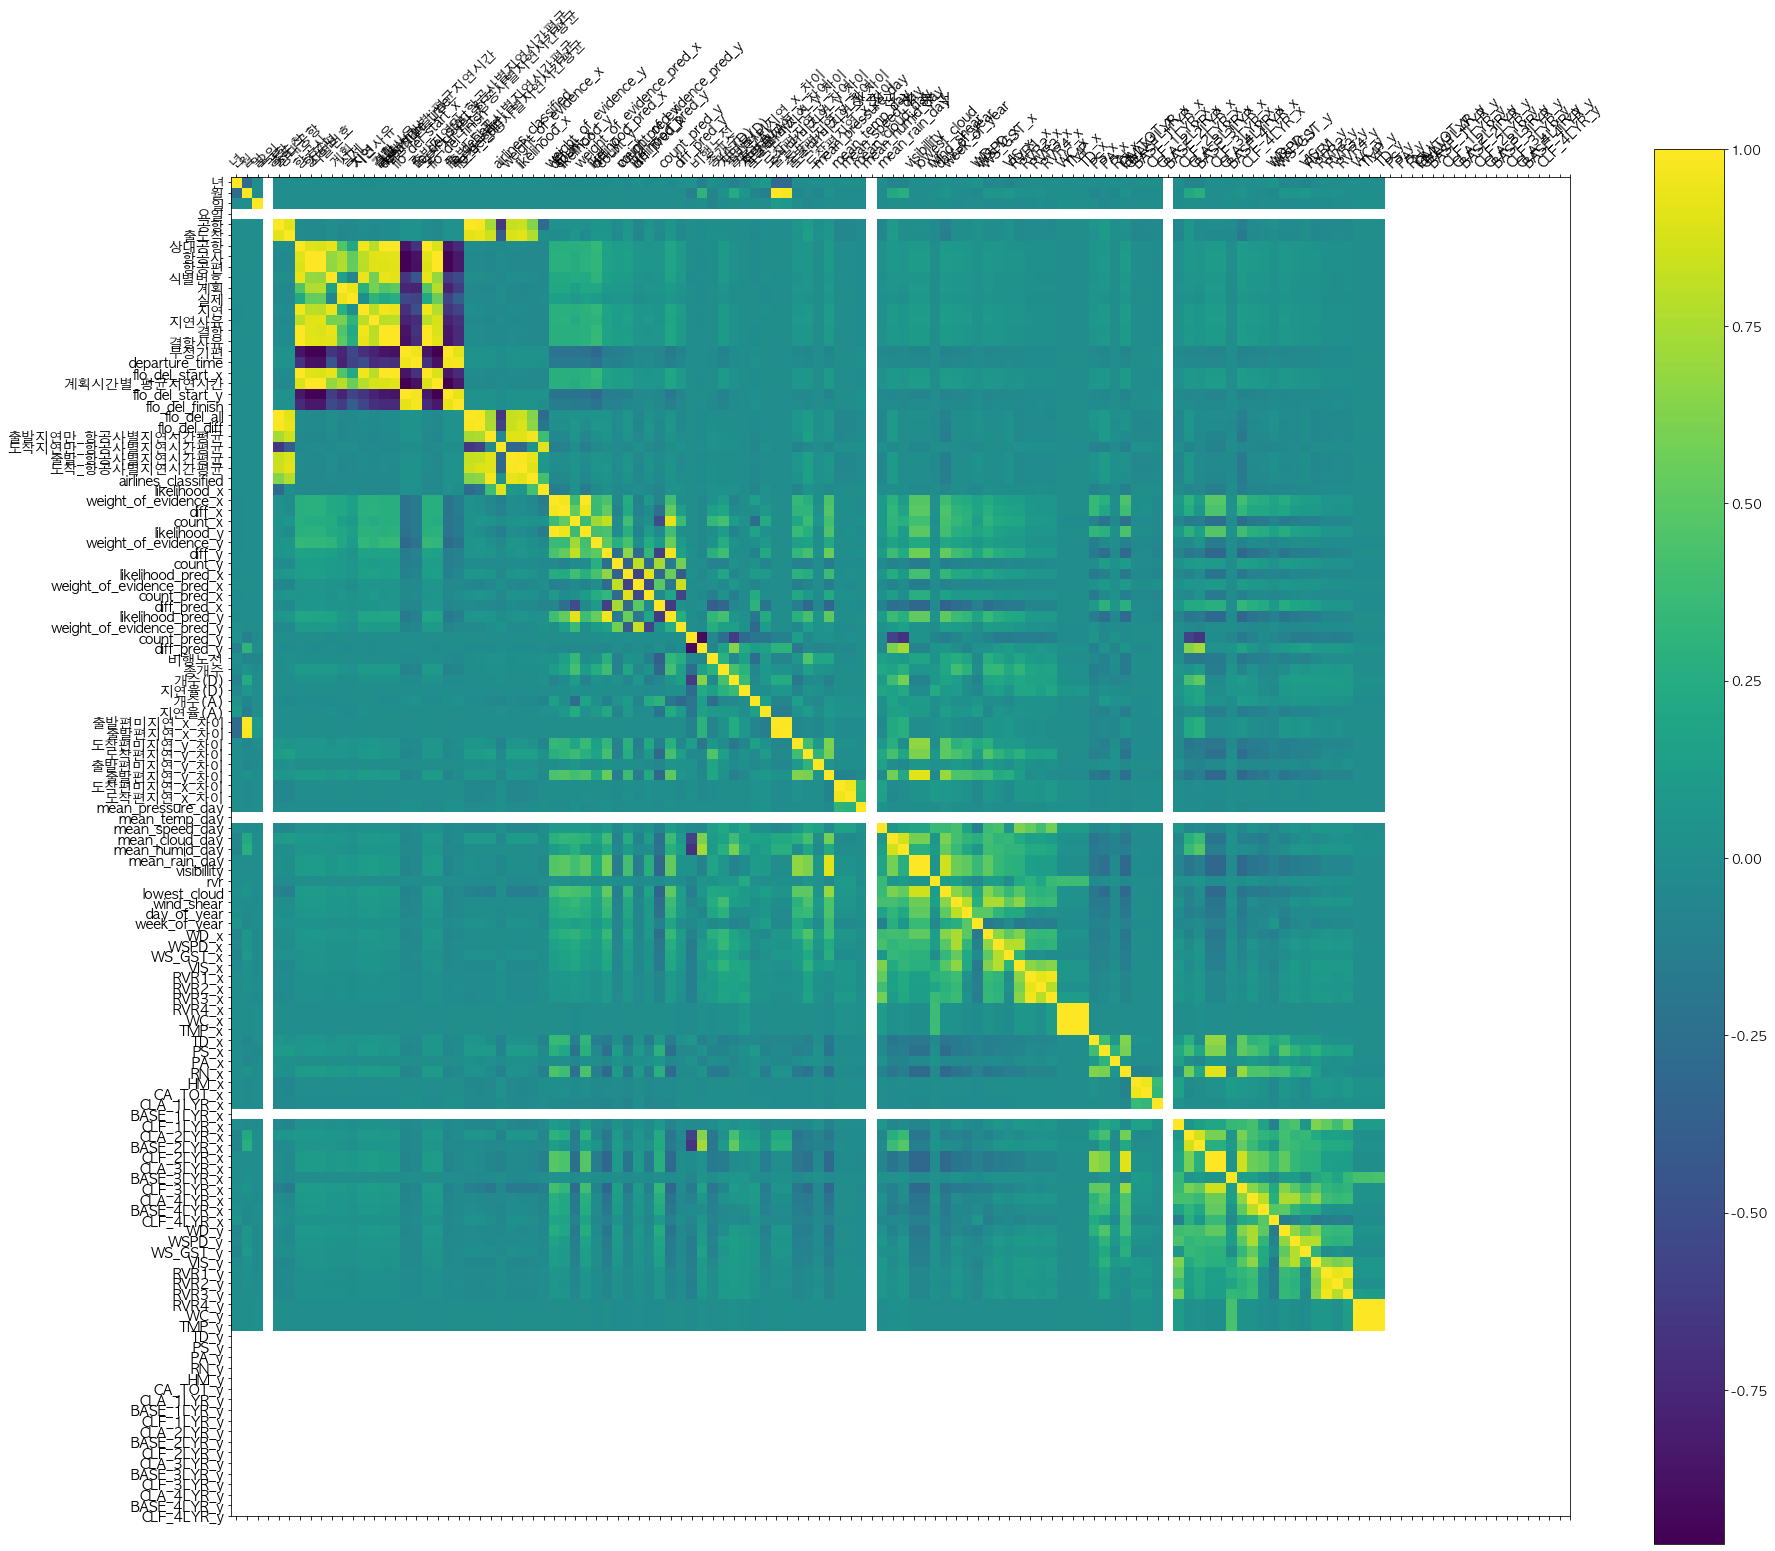

In [202]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(30, 25))
plt.matshow(train.corr(), fignum=f.number)
plt.xticks(range(train.shape[1]), train.columns, fontsize=14, rotation=45)
plt.yticks(range(train.shape[1]), train.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=13)
plt.title('상관관계 분석', fontsize=16)

In [203]:
cordata = train.corr()

In [204]:
for col in cordata.columns:
    for col2 in cordata.columns:
        if ((cordata.loc[col, col2] >= 0.9)&(cordata.loc[col, col2] < 1)) or ((cordata.loc[col, col2] <= -0.9) and (cordata.loc[col, col2] >-1)):
            print(col + '    ' + col2 + '    '+ str(cordata.loc[col, col2]))



월    day_of_year    0.9963348641042997
월    week_of_year    0.9838099535987266
flo_del_start_x    계획시간별_평균지연시간    0.9187437725864889
flo_del_start_x    likelihood_pred_x    0.9999999999949276
flo_del_start_x    weight_of_evidence_pred_x    0.980030870107953
계획시간별_평균지연시간    flo_del_start_x    0.9187437725864889
계획시간별_평균지연시간    likelihood_pred_x    0.9187437725862843
계획시간별_평균지연시간    weight_of_evidence_pred_x    0.9422940321544248
계획시간별_평균지연시간    weight_of_evidence_pred_y    0.9215251834795393
flo_del_start_y    flo_del_finish    0.9002495949659095
flo_del_start_y    flo_del_diff    0.9358818071658002
flo_del_start_y    출발_항공사별지연시간평균    0.9546155850836738
flo_del_start_y    likelihood_x    0.9999999999992548
flo_del_start_y    weight_of_evidence_x    0.9986307825019441
flo_del_start_y    likelihood_y    0.9999999999992548
flo_del_finish    flo_del_start_y    0.9002495949659095
flo_del_finish    flo_del_all    0.9998332652595721
flo_del_finish    도착_항공사별지연시간평균    0.910262433933178
flo_del_

# Schedule 별 feature 합치기

In [205]:
import pandas as pd 
import numpy as np
import pickle
import datetime

In [206]:

# train_model = pd.read_pickle("./train_model.pkl")
# train_model = pd.read_csv("./train_model.csv", engine = "python", encoding = 'CP949')
train_add_schedule = pd.read_csv("../input/train_add_schedule.csv", engine = "python", encoding = 'CP949')
test_add_schedule = pd.read_csv("../input/pred_add_schedule.csv", engine = "python", encoding = 'CP949')


In [207]:
train_add_schedule['STT'] = train_add_schedule['STT'].apply(lambda x : datetime.time(int(x//60), int(x%60)))
train_add_schedule['STT'] = train_add_schedule['STT'].apply(lambda x : '{}:{}'.format(str(x).split(':')[0],str(x).split(':')[1]))

train_add_schedule = train_add_schedule.rename(columns={"SDT_YY" : "년",
                                "SDT_MM" : "월",
                                "SDT_DD" : "일",
                                "REG" : "식별번호",
                                "STT" : "계획"
                  })

variables_to_remove = ['SDT_DY','ARP','ODP','FLO','ATT','IRR','DLY','DELAY','AOD','Unnamed: 0','Unnamed: 0.1','FLT']
train_add_schedule.drop(variables_to_remove, axis = 1, inplace = True)

train = pd.merge(train,train_add_schedule, on = ['년','월','일','식별번호','계획'], how = 'inner')

In [208]:
test_add_schedule['STT'] = test_add_schedule['STT'].apply(lambda x : datetime.time(int(x//60), int(x%60)))
test_add_schedule['STT'] = test_add_schedule['STT'].apply(lambda x : '{}:{}'.format(str(int(str(x).split(':')[0])),str(x).split(':')[1]))

test_add_schedule

test_add_schedule = test_add_schedule.rename(columns={"SDT_YY" : "년",
                                "SDT_MM" : "월",
                                "SDT_DD" : "일",
                                "REG" : "식별번호",
                                "STT" : "계획"
                                ,"FLT" : "항공편"
                  })

variables_to_remove = ['SDT_DY','ARP','ODP','FLO','DLY','AOD','Unnamed: 0', 'DLY_RATE']
test_add_schedule.drop(variables_to_remove, axis = 1, inplace = True)





In [209]:
test_add_schedule

,년,월,일,항공편,계획,ORDER,order_mean,schedule_min,schedule_max,schedule_count,schedule_mean,schedule
0,1.0,1.0,1.0,1,0:01,1.0,1.000000,1.0,1.0,1.0,1.0,1.0
1,2019.0,9.0,29.0,J1005,10:00,1.0,1.133324,2.0,2.0,1.0,2.0,19866.0
2,2019.0,9.0,21.0,B1806,10:00,0.0,16.745794,14.0,14.0,1.0,14.0,20112.0
3,2019.0,9.0,17.0,L1708,10:00,5.0,7.273005,82.0,82.0,1.0,82.0,19994.0
4,2019.0,9.0,29.0,J1110,10:00,4.0,21.796478,18.0,18.0,1.0,18.0,20239.0
5,2019.0,9.0,27.0,B1806,10:00,0.0,16.745794,14.0,14.0,1.0,14.0,20112.0
6,2019.0,9.0,20.0,J1005,10:00,3.0,4.197226,-6.0,-6.0,1.0,-6.0,20235.0
7,2019.0,9.0,27.0,J1005,10:00,3.0,4.197226,-6.0,-6.0,1.0,-6.0,20235.0
8,2019.0,9.0,24.0,J1005,10:00,1.0,1.133324,2.0,2.0,1.0,2.0,19866.0
9,2019.0,9.0,16.0,J1856,10:00,1.0,1.133324,-6.0,-6.0,1.0,-6.0,20142.0


In [210]:
test_add_schedule['년']= test_add_schedule['년'].apply(lambda x: str(int(x)))
test_add_schedule['월']=test_add_schedule['월'].apply(lambda x: str(int(x)))
test_add_schedule['일']= test_add_schedule['일'].apply(lambda x: str(int(x)))

In [211]:
test_add_schedule['년']= test_add_schedule['년'].apply(lambda x: np.int64(x))
test_add_schedule['월']=test_add_schedule['월'].apply(lambda x: np.int64(x))
test_add_schedule['일']= test_add_schedule['일'].apply(lambda x: np.int64(x))
test_add_schedule['항공편']= test_add_schedule['항공편'].apply(lambda x: str(x))
test_add_schedule['계획']= test_add_schedule['계획'].apply(lambda x: str(x))


In [212]:
print(type(pred['년'][0]))
print(type(pred['월'][0]))
print(type(pred['일'][0]))
print(type(pred['계획'][0]))
print(type(pred['항공편'][0]))


<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>


In [213]:
test_add_schedule.columns
test_add_schedule = test_add_schedule[['년', '월', '일', '항공편', '계획',  'ORDER', 'order_mean', 'schedule_min',
       'schedule_max', 'schedule_count', 'schedule_mean', 'schedule']]
test_add_schedule

,년,월,일,항공편,계획,ORDER,order_mean,schedule_min,schedule_max,schedule_count,schedule_mean,schedule
0,1,1,1,1,0:01,1.0,1.000000,1.0,1.0,1.0,1.0,1.0
1,2019,9,29,J1005,10:00,1.0,1.133324,2.0,2.0,1.0,2.0,19866.0
2,2019,9,21,B1806,10:00,0.0,16.745794,14.0,14.0,1.0,14.0,20112.0
3,2019,9,17,L1708,10:00,5.0,7.273005,82.0,82.0,1.0,82.0,19994.0
4,2019,9,29,J1110,10:00,4.0,21.796478,18.0,18.0,1.0,18.0,20239.0
5,2019,9,27,B1806,10:00,0.0,16.745794,14.0,14.0,1.0,14.0,20112.0
6,2019,9,20,J1005,10:00,3.0,4.197226,-6.0,-6.0,1.0,-6.0,20235.0
7,2019,9,27,J1005,10:00,3.0,4.197226,-6.0,-6.0,1.0,-6.0,20235.0
8,2019,9,24,J1005,10:00,1.0,1.133324,2.0,2.0,1.0,2.0,19866.0
9,2019,9,16,J1856,10:00,1.0,1.133324,-6.0,-6.0,1.0,-6.0,20142.0


In [214]:
test1 = pd.merge(pred,test_add_schedule, on = ['년','월','일','항공편','계획'], how = 'inner')

In [215]:
# test1 = test1[['년', '월', '일', '항공편', '계획',  'ORDER', 'order_mean', 'schedule_min',
#        'schedule_max', 'schedule_count', 'schedule_mean', 'schedule']]
test1

,년,월,일,요일,공항,출도착,상대공항,항공사,항공편,계획,...,CLA_4LYR_y,BASE_4LYR_y,CLF_4LYR_y,ORDER,order_mean,schedule_min,schedule_max,schedule_count,schedule_mean,schedule
0,2019,9,16,월,김포,도착,제주,티웨이,L1702,9:05,...,0.0,0.0,0.0,1.0,1.350937,-5.0,-5.0,1.0,-5.0,20231.0
1,2019,9,16,월,김포,도착,제주,티웨이,L1706,9:55,...,0.0,0.0,0.0,3.0,5.166557,-2.0,-2.0,1.0,-2.0,19040.0
2,2019,9,17,화,김포,도착,제주,티웨이,L1702,9:05,...,0.0,0.0,0.0,3.0,5.166557,-4.0,-4.0,1.0,-4.0,20264.0
3,2019,9,17,화,김포,도착,제주,티웨이,L1706,9:55,...,0.0,0.0,0.0,4.0,20.777100,6.0,6.0,1.0,6.0,19991.0
4,2019,9,18,수,김포,도착,제주,티웨이,L1702,9:05,...,0.0,0.0,0.0,1.0,1.350937,-5.0,-5.0,1.0,-5.0,20231.0
5,2019,9,18,수,김포,도착,제주,티웨이,L1706,9:55,...,0.0,0.0,0.0,3.0,5.166557,-2.0,-2.0,1.0,-2.0,19040.0
6,2019,9,18,수,김포,도착,제주,티웨이,L1704,9:35,...,0.0,0.0,0.0,3.0,5.166557,11.0,11.0,1.0,11.0,20214.0
7,2019,9,19,목,김포,도착,제주,티웨이,L1702,9:05,...,0.0,0.0,0.0,1.0,1.350937,-5.0,-5.0,1.0,-5.0,20231.0
8,2019,9,19,목,김포,도착,제주,티웨이,L1706,9:55,...,0.0,0.0,0.0,3.0,5.166557,39.0,39.0,1.0,39.0,19573.0
9,2019,9,20,금,김포,도착,제주,티웨이,L1702,9:05,...,0.0,0.0,0.0,1.0,1.350937,-5.0,-5.0,1.0,-5.0,20231.0


In [216]:
test1 = test1[['년', '월', '일', '항공편', '계획',  'ORDER', 'order_mean', 'schedule_min',
       'schedule_max', 'schedule_count', 'schedule_mean', 'schedule']]
test1

,년,월,일,항공편,계획,ORDER,order_mean,schedule_min,schedule_max,schedule_count,schedule_mean,schedule
0,2019,9,16,L1702,9:05,1.0,1.350937,-5.0,-5.0,1.0,-5.0,20231.0
1,2019,9,16,L1706,9:55,3.0,5.166557,-2.0,-2.0,1.0,-2.0,19040.0
2,2019,9,17,L1702,9:05,3.0,5.166557,-4.0,-4.0,1.0,-4.0,20264.0
3,2019,9,17,L1706,9:55,4.0,20.777100,6.0,6.0,1.0,6.0,19991.0
4,2019,9,18,L1702,9:05,1.0,1.350937,-5.0,-5.0,1.0,-5.0,20231.0
5,2019,9,18,L1706,9:55,3.0,5.166557,-2.0,-2.0,1.0,-2.0,19040.0
6,2019,9,18,L1704,9:35,3.0,5.166557,11.0,11.0,1.0,11.0,20214.0
7,2019,9,19,L1702,9:05,1.0,1.350937,-5.0,-5.0,1.0,-5.0,20231.0
8,2019,9,19,L1706,9:55,3.0,5.166557,39.0,39.0,1.0,39.0,19573.0
9,2019,9,20,L1702,9:05,1.0,1.350937,-5.0,-5.0,1.0,-5.0,20231.0


In [217]:
pred = pd.merge(pred,test1, on = ['년','월','일','항공편','계획'], how = 'outer')
pred

,년,월,일,요일,공항,출도착,상대공항,항공사,항공편,계획,...,CLA_4LYR_y,BASE_4LYR_y,CLF_4LYR_y,ORDER,order_mean,schedule_min,schedule_max,schedule_count,schedule_mean,schedule
0,2019,9,16,월,김포,도착,제주,티웨이,L1702,9:05,...,0.0,0.0,0.0,1.0,1.350937,-5.0,-5.0,1.0,-5.0,20231.0
1,2019,9,16,월,김포,도착,제주,티웨이,L1706,9:55,...,0.0,0.0,0.0,3.0,5.166557,-2.0,-2.0,1.0,-2.0,19040.0
2,2019,9,17,화,김포,도착,제주,티웨이,L1702,9:05,...,0.0,0.0,0.0,3.0,5.166557,-4.0,-4.0,1.0,-4.0,20264.0
3,2019,9,17,화,김포,도착,제주,티웨이,L1706,9:55,...,0.0,0.0,0.0,4.0,20.777100,6.0,6.0,1.0,6.0,19991.0
4,2019,9,18,수,김포,도착,제주,티웨이,L1702,9:05,...,0.0,0.0,0.0,1.0,1.350937,-5.0,-5.0,1.0,-5.0,20231.0
5,2019,9,18,수,김포,도착,제주,티웨이,L1706,9:55,...,0.0,0.0,0.0,3.0,5.166557,-2.0,-2.0,1.0,-2.0,19040.0
6,2019,9,18,수,김포,도착,제주,티웨이,L1704,9:35,...,0.0,0.0,0.0,3.0,5.166557,11.0,11.0,1.0,11.0,20214.0
7,2019,9,19,목,김포,도착,제주,티웨이,L1702,9:05,...,0.0,0.0,0.0,1.0,1.350937,-5.0,-5.0,1.0,-5.0,20231.0
8,2019,9,19,목,김포,도착,제주,티웨이,L1706,9:55,...,0.0,0.0,0.0,3.0,5.166557,39.0,39.0,1.0,39.0,19573.0
9,2019,9,20,금,김포,도착,제주,티웨이,L1702,9:05,...,0.0,0.0,0.0,1.0,1.350937,-5.0,-5.0,1.0,-5.0,20231.0


In [218]:
# train['weight_of_evidence_y', 'CLF_4LYR_y']

In [219]:
print(train.shape)
print(pred.shape)

train = train.drop(['index', 'weight_of_evidence_x', 'weight_of_evidence_y', 'CLF_4LYR_y'], axis = 1) 
pred = pred.drop([ 'weight_of_evidence_x', 'weight_of_evidence_y', 'CLF_4LYR_y'], axis = 1) 




(971999, 135)
(15980, 129)


In [220]:
print(train.shape)
print(pred.shape)


(971999, 131)
(15980, 126)


In [221]:
train = train.drop(['weight_of_evidence_pred_x', 'weight_of_evidence_pred_y'], axis = 1) 
pred = pred.drop(['weight_of_evidence_pred_x', 'weight_of_evidence_pred_y'], axis = 1) 

In [222]:
train = train.drop(['RVR3_y', 'CLA_3LYR_y', 'CLA_3LYR_x', 'flo_del_diff', 'diff_x'], axis = 1) 
pred = pred.drop(['RVR3_y', 'CLA_3LYR_y', 'CLA_3LYR_x', 'flo_del_diff', 'diff_x'], axis = 1)

# RVR3_y -> 활주로 가시거리 
# CLA_3LYR_y, CLA_3LYR_x -> 
# 출발 항공사 별 지연시간 평균 -> 상식적으로 생각했을 때, 항공사별 출발 지연이 차이가 나기가 어렵다.
# 하지만 항공사별 도착 지연은 차이가 날 수 있는데, 항공사별 정책에 따라 운행시간을 줄인다던가 하는 차이가 존재할 수 있다.
# 따라서 지워도 된다.
# flo_del_diff -> 출발지연율 - 도착지연율 의미 없다.
# 모델을 돌리면서 의미 없는 노선들만 지움


In [223]:
print(train.shape)
print(pred.shape)


(971999, 124)
(15980, 119)


In [226]:
# pred = pred.drop(pred[pred['항공사'] == 'M'], axis = 0)

In [231]:
temp1 = train.columns
temp2 = pred.columns
temp3 = set()
temp4 = set()

for i in temp1:
    if i in temp2:
        temp3.add(i)
    else:
        temp4.add(i)
            
print(temp3)
print('\n')
print('\n')
print('\n')
print('\n')
print(temp4)

{'likelihood_y', 'schedule', '월', '공항', '도착_항공사별지연시간평균', 'visibillity', 'CLF_4LYR_x', 'schedule_count', 'PA_y', 'VIS_y', '지연율(D)', 'TD_y', 'count_x', 'RVR1_y', '도착편지연_x_차이', '요일', 'WSPD_y', 'flo_del_start_x', '총개수', 'ORDER', 'CA_TOT_y', 'departure_time', '출발편미지연_y_차이', 'mean_pressure_day', '개수(D)', 'RVR1_x', 'CLA_1LYR_y', 'WD_y', 'WD_x', '계획', '도착편미지연_y_차이', '출발편지연_y_차이', 'count_pred_x', 'count_y', 'airlines_classified', 'TMP_x', 'CA_TOT_x', 'order_mean', 'WS_GST_x', 'CLF_1LYR_y', 'CLF_2LYR_y', 'CLA_2LYR_x', 'BASE_3LYR_x', 'PS_y', '년', 'RN_x', 'mean_temp_day', 'mean_cloud_day', '항공편', 'CLF_3LYR_y', 'count_pred_y', 'rvr', 'PA_x', 'BASE_2LYR_y', 'RVR2_y', '출발편미지연_x_차이', '출발_항공사별지연시간평균', 'CLF_3LYR_x', 'HM_x', 'WSPD_x', 'BASE_4LYR_y', '출도착', '도착지연만_항공사별지연시간평균', '개수(A)', 'flo_del_all', 'flo_del_finish', 'schedule_max', '항공사', 'PS_x', 'CLF_1LYR_x', 'BASE_1LYR_x', 'lowest_cloud', 'RVR2_x', 'mean_rain_day', '지연', 'wind_shear', 'WC_x', 'schedule_min', '출발지연만_항공사별지연시간평균', 'likelihood_pred_y', 'B

# 모델에 넣을 데이터 파일 쓰기

In [224]:
train.to_pickle("../model_feed_output/train_model.pkl")
pred.to_pickle("../model_feed_output/pred_model.pkl")